# 8. Plotting with time series

Time-series variables are populated by values which are specific to a point in time. Time is linear and infinitely fine-grained, so in fact time-series values are a kind of special case of interval variables.


## 8.1 Types of time series variables

Dates can show up in your dataset in a few different ways. We'll examine the two most common ways in this lesson.

- date as data index
- date as data timestamp

### 8.1.1 Date as data index

In the "strong case" dates act as an explicit index on your dataset. Below dataset on stock prices is a good example

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot

In [3]:
root_path="https://minio.lab.sspcloud.fr/pengfei/diffusion/data_viz"
stocks_input_file = f'{root_path}/prices.csv'

stocks = pd.read_csv(stocks_input_file,parse_dates=['date'])

In [4]:
print(stocks.head())

        date symbol        open       close         low        high     volume
0 2016-01-05   WLTW  123.430000  125.839996  122.309998  126.250000  2163600.0
1 2016-01-06   WLTW  125.239998  119.980003  119.940002  125.540001  2386400.0
2 2016-01-07   WLTW  116.379997  114.949997  114.930000  119.739998  2489500.0
3 2016-01-08   WLTW  115.480003  116.620003  113.500000  117.440002  2006300.0
4 2016-01-11   WLTW  117.010002  114.970001  114.089996  117.330002  1408600.0


In [5]:
# before this command, the column date is a normal column, after this, it becomes the index of the data set
stocks = stocks[stocks['symbol'] == "GOOG"].set_index('date')

print(stocks.head())

           symbol        open       close         low        high      volume
date                                                                         
2010-01-04   GOOG  626.951088  626.751061  624.241073  629.511067   3927000.0
2010-01-05   GOOG  627.181073  623.991055  621.541045  627.841071   6031900.0
2010-01-06   GOOG  625.861078  608.261023  606.361042  625.861078   7987100.0
2010-01-07   GOOG  609.401025  594.101005  592.651008  610.001045  12876600.0
2010-01-08   GOOG  592.000997  602.021036  589.110988  603.251034   9483900.0


This dataset which is indexed by the date: the data being collected is being collected in the "period" of a day. The values in the record provide information about that stock within that period.

For daily data like this using a date like this is convenient. But a period can technically be for any length of time. `pandas` provides a whole dedicated type, the pandas.Period dtype, for this concept.
(documented here https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Period.html)

### 8.1.2 Date as data timestamp

In the "weak case", dates act as timestamps: they tell us something about when an observation occurred. For example, in the following dataset of animal shelter outcomes, there are two columns, datetime and date_of_birth, which describe facts about the animal in the observation.

In [6]:
shelter_outcomes_file=f'{root_path}/aac_shelter_outcomes.csv'
shelter_outcomes=pd.read_csv(shelter_outcomes_file,parse_dates=['date_of_birth','datetime'])

In [7]:
shelter_outcomes = shelter_outcomes[
    ['outcome_type', 'age_upon_outcome', 'datetime', 'animal_type', 'breed',
     'color', 'sex_upon_outcome', 'date_of_birth']
]

In [8]:
print(shelter_outcomes.head())

  outcome_type age_upon_outcome            datetime animal_type  \
0     Transfer          2 weeks 2014-07-22 16:04:00         Cat   
1     Transfer           1 year 2013-11-07 11:47:00         Dog   
2     Adoption           1 year 2014-06-03 14:20:00         Dog   
3     Transfer          9 years 2014-06-15 15:50:00         Dog   
4   Euthanasia         5 months 2014-07-07 14:04:00       Other   

                     breed         color sex_upon_outcome date_of_birth  
0   Domestic Shorthair Mix  Orange Tabby      Intact Male    2014-07-07  
1               Beagle Mix   White/Brown    Spayed Female    2012-11-06  
2                 Pit Bull    Blue/White    Neutered Male    2013-03-31  
3  Miniature Schnauzer Mix         White    Neutered Male    2005-06-02  
4                  Bat Mix         Brown          Unknown    2014-01-07  


To put this another way, the stock data is aggregated over a certain period of time, so changing the time significantly
changes the data. In the animal outcomes case, information is "record-level"; the dates are descriptive facts and it
doesn't make sense to change them.

## 8.2 Visualizing by grouping

I said earlier that time is a "special case" of an interval variable. Does that mean that we can use the tools and techniques familiar to us from earlier sections with time series data as well? Of course!

For example, here's a line plot visualizing which birth-dates are the most common in the dataset


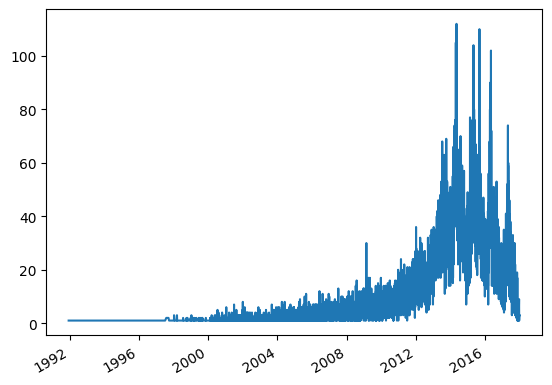

In [9]:
# count the animal number groupby date of birth
shelter_outcomes['date_of_birth'].value_counts().sort_values().plot.line()
plt.show()

It looks like birth dates for the animals in the dataset peak at around 2015, but it's hard to tell for sure because the data is rather noisy.

Currently, the data is by day, but what if we globed all the dates together into years? This is known as **resampling.**
We can do this to tweak the dataset, generating a result that's aggregated by year. The method for doing this in pandas, `resample`, is pretty simple. There are lots of potential resampling options: we'll use Y, which is short for "year".

The following is the frequency args of **resample** function

```text
B       business day frequency
C       custom business day frequency (experimental)
D       calendar day frequency
W       weekly frequency
M       month end frequency
SM      semi-month end frequency (15th and end of month)
BM      business month end frequency
CBM     custom business month end frequency
MS      month start frequency
SMS     semi-month start frequency (1st and 15th)
BMS     business month start frequency
CBMS    custom business month start frequency
Q       quarter end frequency
BQ      business quarter endfrequency
QS      quarter start frequency
BQS     business quarter start frequency
A       year end frequency
BA      business year end frequency
AS      year start frequency
BAS     business year start frequency
BH      business hour frequency
H       hourly frequency
T       minutely frequency
S       secondly frequency
L       milliseonds
U       microseconds
N       nanoseconds

```


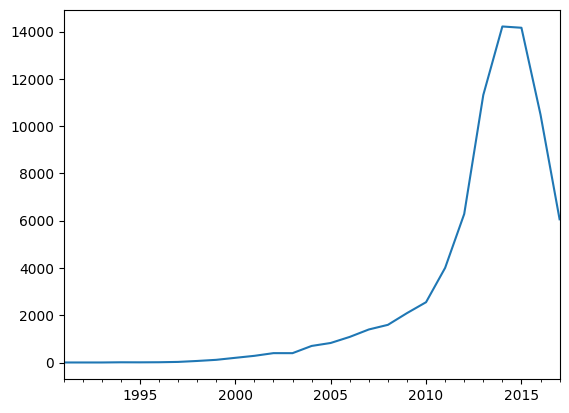

In [10]:
shelter_outcomes['date_of_birth'].value_counts().resample('AS').sum().plot.line()
plt.show()

Much clearer! It looks like, actually, 2014 and 2015 have an almost equal presence in the dataset.

This demonstrates the data visualization benefit of resampling: by choosing certain periods you can more clearly
visualize certain aspects of the dataset.

Notice that pandas is automatically adapting the labels on the x-axis to match our output type. This is because pandas
is "datetime-aware"; it knows that when we have data points spaced out one year apart from one another, we only want
to see the years in the labels, and nothing else!

Usually the value of time-series data is exposed through this sort of grouping. For example, here's a similar simple
bar chart which looks at the trade volume of the GOOG stock:


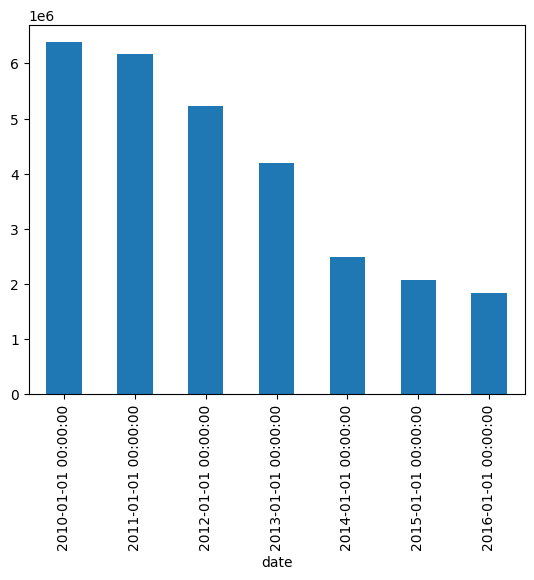

In [11]:
stocks['volume'].resample('AS').mean().plot.bar()
plt.show()

Most of the "new stuff" to using dates in your visualization comes down to a handful of new data processing techniques.
Because timestamps are "just" interval variables, understanding date-time data don't require any newfangled visualization techniques!

## 8.3 Lag plot

A lag plot compares data points from each observation in the dataset against data points from a previous observation.
So for example, data from December 21st will be compared with data from December 20th, which will in turn be compared with data from December 19th, and so on.

Here is a good [explanation](http://www.statisticshowto.com/lag-plot/) of lag plot

The shape of the lag plot can provide clues about the underlying structure of your data. For example:

A linear shape to the plot suggests that an autoregressive model is probably a better choice.
An elliptical plot suggests that the data comes from a single-cycle sinusoidal model.

For example, here is what we see when we apply a lag plot to the volume
(number of trades conducted) in the stock data:

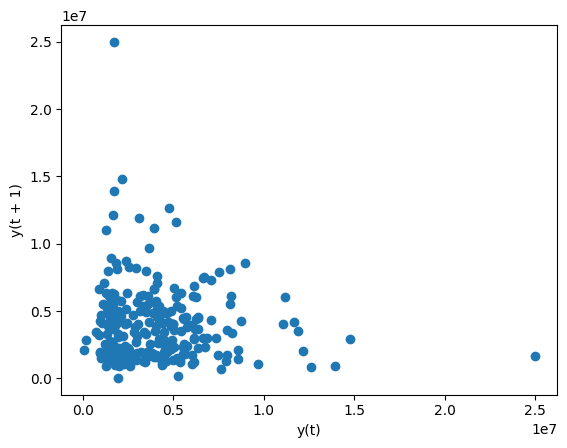

In [12]:
lag_plot(stocks['volume'].sample(250))
plt.show()

It looks like days when volume is high are only very loosely correlated with one another. In other words, a day of frantic trading does not necessarily signal that the next day will also involve frantic trading. In fact, there seem to be quite a few days of extremely high trading activity which stand out all alone!

Time-series data tends to exhibit a behavior called periodicity: rises and peaks in the data that are correlated with
time. For example, a gym would likely see an increase in attendance at the end of every workday, hence exhibiting a
periodicity of a day. A bar would likely see a bump in sales on Friday, exhibiting periodicity over the course of a week. And so on.

Lag plots are extremely useful because they are a simple way of checking datasets for this kind of periodicity.

Note that they only work on "strong case" timeseries data.

## 8.4 Autocorrelation plot

In a autocorrelation plot, if the vertical line (a "spike") corresponding to each lag(time series) rises above or falls
below the dashed lines is considered to be statistically significant (e.g. dashed lines y=0.3 and y=-0.3) all the spikes
with y>0.3 and y<-0.3 are significant.  If a spike is significantly different from zero, that is evidence of
autocorrelation. A spike that’s close to zero is evidence against autocorrelation.


A plot type that takes this concept and goes even further with it is the **autocorrelation plot**. The autocorrelation plot is a multivariate summarization-type plot that lets you check every periodicity at the same time. It does this by computing a summary statistic—the correlation score—across every possible lag in the dataset. This is known as
autocorrelation.

In an autocorrelation plot the lag is on the x-axis and the autocorrelation score is on the y-axis. The farther away the autocorrelation is from 0, the greater the influence that records that far away from each other exert on one another.

Here is what an autocorrelation plot looks like when applied to the stock volume data:


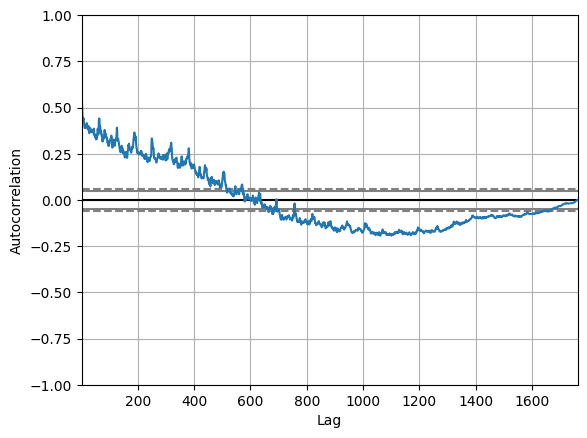

In [13]:
autocorrelation_plot(stocks['volume'])
plt.show()

It seems like the volume of trading activity is weakly descendingly correlated with trading volume from the year prior.
There aren't any significant non-random peaks in the dataset, so this is good evidence that there isn't much of a
time-series pattern to the volume of trade activity over time.

Of course, in this short optional section we're only scratching the surface of what you can do with do with time-series
data. There's an entire literature around how to work with time-series variables that we are not discussing here.
But these are the basics, and hopefully enough to get you started analyzing your own time-dependent data!

## 8.5 Exercises

### Q1. Time-series variables are really a special case of what other type of variable?
  (No, it's just a special case interval data)

### Q2. Why is resampling useful in a data visualization context?
Resampling is often useful in data visualization because it can help clean up and denoise our plots by aggregating on a different level.

### Q3. What is lag? What is autocorrelation?
Lag is the time-difference for each observation in the dataset. Autocorrelation is correlation applied to lag.


In [14]:
crypto_input_file=f"{root_path}/crypto-markets.csv"
crypto=pd.read_csv(crypto_input_file)

In [15]:
crypto = crypto[crypto['name']=='Bitcoin']
crypto['date'] = pd.to_datetime(crypto['date'])

In [16]:
print(crypto.head())

      slug symbol     name       date  ranknow    open    high     low  \
0  bitcoin    BTC  Bitcoin 2013-04-28        1  135.30  135.98  132.10   
1  bitcoin    BTC  Bitcoin 2013-04-29        1  134.44  147.49  134.00   
2  bitcoin    BTC  Bitcoin 2013-04-30        1  144.00  146.93  134.05   
3  bitcoin    BTC  Bitcoin 2013-05-01        1  139.00  139.89  107.72   
4  bitcoin    BTC  Bitcoin 2013-05-02        1  116.38  125.60   92.28   

    close  volume        market  close_ratio  spread  
0  134.21     0.0  1.500520e+09       0.5438    3.88  
1  144.54     0.0  1.491160e+09       0.7813   13.49  
2  139.00     0.0  1.597780e+09       0.3843   12.88  
3  116.99     0.0  1.542820e+09       0.2882   32.17  
4  105.21     0.0  1.292190e+09       0.3881   33.32  


### Q4.  line chart depicting the datetime column in shelter_outcomes aggregated by year

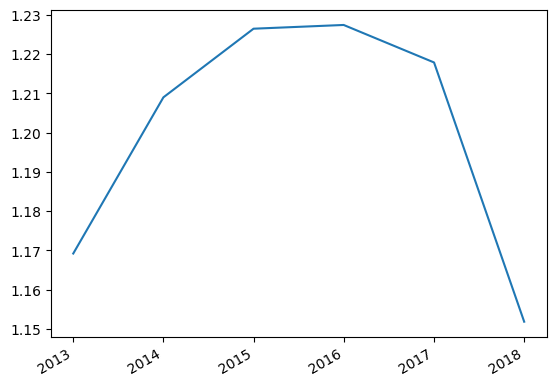

In [17]:
shelter_outcomes['datetime'].value_counts().resample("AS").mean().sort_values().plot.line()
plt.show()

### Q5.  A lag plot of cryptocurrency (crypto) trading volume


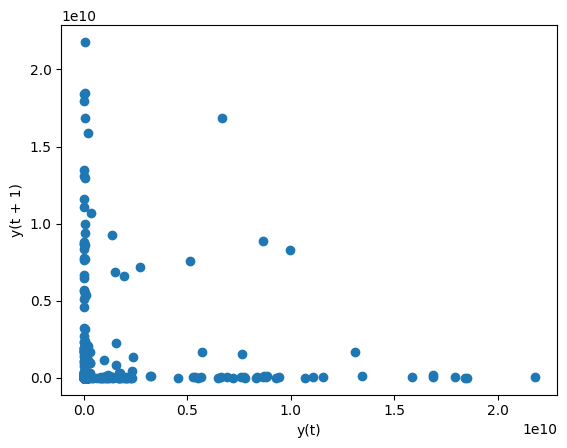

In [18]:
lag_plot(crypto['volume'].sample(500))
plt.show()
# no pattern detected

### Q6. An autocorrelation plot of cryptocurrency (crypto) trading volume.

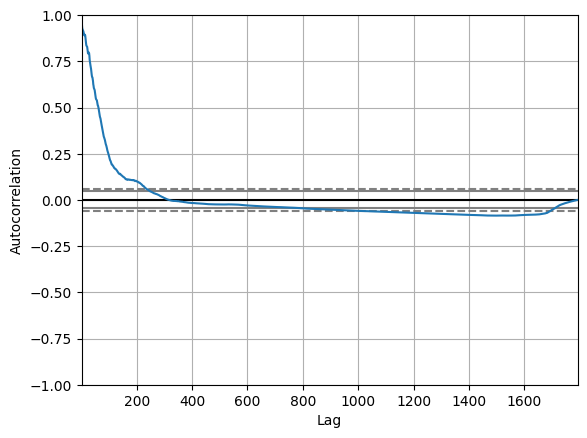

In [19]:
autocorrelation_plot(crypto['volume'])
plt.show()

# no significante autocorrolation detected